In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *
from ctrace.problem_label import *
from ctrace.utils import *
from ctrace.drawing import *

In [3]:
G_mont = load_graph_montgomery_labels()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "c7.json", 'r') as infile:
    j = json.load(infile)
    (S, I1, I2, R) = (j["S"], j["I1"], j["I2"], j["R"])
    infections = j["infections"]


In [4]:
state = InfectionState(G_mont, (S, I1, I2, R), 750, "none", 0.05, True, 0.8, True, 1, 1)


In [16]:
rng = np.random.default_rng(42)
to_q = binary_segmented_greedy(state, k1=.3, k2=.8, carry=True,rng=rng, DEBUG=False)
to_q

action_degrees = list(sorted(state.G.degree(n) for n in to_q))

<AxesSubplot:ylabel='Count'>

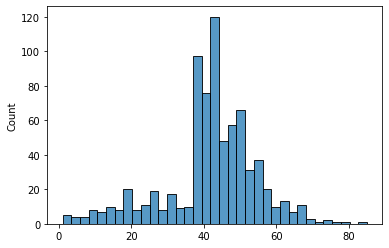

In [17]:
sns.histplot(action_degrees)

In [4]:
state_history = []
action_history = []

def pct_format(name, v1, v2):
    pct = f"{(v1 / v2) * 100:.1f}%" if v2 != 0 else "-%"
    return f"{name}: {v1}/{v2} ({pct})"

while len(state.SIR.I2) + len(state.SIR.I1)!=0:
    action = segmented_greedy(state)
    
    state_history.append(state.SIR)
    action_history.append(action)
    
    print(f"Size (S, I1, I2, R): {(len(state.SIR.S), len(state.SIR.I1), len(state.SIR.I2), len(state.SIR.R))}")
    print(f"V1 Size: {len(state.V1)}")
    print(f"V2 Size: {len(state.V2)}")
    print(pct_format("Budget Utilization", len(action), state.budget))
    print(pct_format("V1 Quarantined (out of V1)", len(action), len(state.V1)))
    print(pct_format("I1 Quarantined (out of budget)", len(set(state.SIR.I1) & set(action)), len(action)))
    print("-----------------------------")
    
    # Mutable state
    state.step(action)
action_history.append(set())

Size (S, I1, I2, R): (74847, 269, 160, 181)
V1 Size: 2951
V2 Size: 22863
Budget Utilization: 1000/1000 (100.0%)
V1 Quarantined (out of V1): 1000/2951 (33.9%)
I1 Quarantined (out of Q): 90/1000 (9.0%)
-----------------------------
Size (S, I1, I2, R): (74370, 477, 269, 341)
V1 Size: 2639
V2 Size: 20170
Budget Utilization: 1000/1000 (100.0%)
V1 Quarantined (out of V1): 1000/2639 (37.9%)
I1 Quarantined (out of Q): 99/1000 (9.9%)
-----------------------------
Size (S, I1, I2, R): (73897, 473, 477, 610)
V1 Size: 4383
V2 Size: 27494
Budget Utilization: 1000/1000 (100.0%)
V1 Quarantined (out of V1): 1000/4383 (22.8%)
I1 Quarantined (out of Q): 63/1000 (6.3%)
-----------------------------
Size (S, I1, I2, R): (73237, 660, 473, 1087)
V1 Size: 5162
V2 Size: 30144
Budget Utilization: 1000/1000 (100.0%)
V1 Quarantined (out of V1): 1000/5162 (19.4%)
I1 Quarantined (out of Q): 68/1000 (6.8%)
-----------------------------
Size (S, I1, I2, R): (72414, 823, 660, 1560)
V1 Size: 7562
V2 Size: 34670
Budge

In [22]:
import json
params = dis

json.dumps(params)

'[{"split_pcts": [1.0, 0.0]}, {"split_pcts": [0.99, 0.01]}, {"split_pcts": [0.98, 0.02]}, {"split_pcts": [0.97, 0.03]}, {"split_pcts": [0.96, 0.04]}, {"split_pcts": [0.95, 0.05]}, {"split_pcts": [0.94, 0.06]}, {"split_pcts": [0.93, 0.07]}, {"split_pcts": [0.92, 0.08]}, {"split_pcts": [0.91, 0.09]}, {"split_pcts": [0.9, 0.1]}, {"split_pcts": [0.89, 0.11]}, {"split_pcts": [0.88, 0.12]}, {"split_pcts": [0.87, 0.13]}, {"split_pcts": [0.86, 0.14]}, {"split_pcts": [0.85, 0.15]}, {"split_pcts": [0.84, 0.16]}, {"split_pcts": [0.83, 0.17]}, {"split_pcts": [0.82, 0.18]}, {"split_pcts": [0.81, 0.19]}, {"split_pcts": [0.8, 0.2]}, {"split_pcts": [0.79, 0.21]}, {"split_pcts": [0.78, 0.22]}, {"split_pcts": [0.77, 0.23]}, {"split_pcts": [0.76, 0.24]}, {"split_pcts": [0.75, 0.25]}, {"split_pcts": [0.74, 0.26]}, {"split_pcts": [0.73, 0.27]}, {"split_pcts": [0.72, 0.28]}, {"split_pcts": [0.71, 0.29]}, {"split_pcts": [0.7, 0.3]}, {"split_pcts": [0.69, 0.31]}, {"split_pcts": [0.68, 0.32]}, {"split_pcts": [